### **Description**
#### **Data Description:**

You are provided with a dataset  of  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique  id.  The  dataset  comprises  12  plant  species.  The  goal  of  the  project  is  to  create  a  classifier  capable  of  determining  a plant's species from a photo.


#### **Dataset:**
The dataset can be download from Olympus.The data file names are:
* images.npy
* Label.csv


#### **Context:**
Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, hasrecently released a dataset containing images of unique plants belonging to 12 species at several growth stages


#### **Objective:**
To implement the techniques learnt as a part of the course.

#### **Learning Outcomes:**
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the libraries**

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers


### **Importing the Data Files**

In [3]:
images = np.load("/content/drive/MyDrive/Colab Notebooks/Data/Introduction to Computer Vision/Project 8/images.npy")
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Introduction to Computer Vision/Project 8/Labels.csv")

In [4]:
images.shape

(4750, 128, 128, 3)

In [5]:
labels.shape

(4750, 1)

In [6]:
plant_count = labels['Label'].value_counts()
plant_count

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

In [7]:
plant_categories = plant_count.index

In [8]:
plant_categories

Index(['Loose Silky-bent', 'Common Chickweed', 'Scentless Mayweed',
       'Small-flowered Cranesbill', 'Fat Hen', 'Charlock', 'Sugar beet',
       'Cleavers', 'Black-grass', 'Shepherds Purse', 'Common wheat', 'Maize'],
      dtype='object')

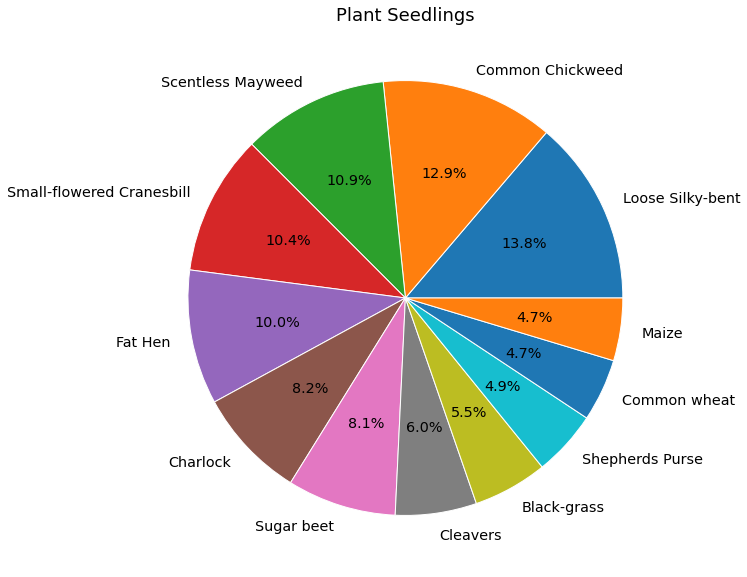

In [9]:
# create the pie chart
ax = plant_count.plot(kind = 'pie', figsize=(10, 10),  autopct='%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_ylabel(None)
ax.set_title('Plant Seedlings', fontsize=18)
plt.show()

#### Seperate plant seedlings

In [10]:
Loose_Silky_bent_imgs = []
Common_Chickweed_imgs = []
Scentless_Mayweed_imgs = []
Small_flowered_Cranesbill_imgs = []
Fat_Hen_imgs = []
Charlock_imgs = []
Sugar_beet_imgs = []
Cleavers_imgs = []
Black_grass_imgs = []
Shepherds_Purse_imgs = []
Common_wheat_imgs = []
Maize_imgs = []

i = 0
while i < labels.shape[0]:
  if labels['Label'][i] == "Loose Silky-bent":
    Loose_Silky_bent_imgs.append(images[i])
  if labels['Label'][i] == "Common Chickweed":
    Common_Chickweed_imgs.append(images[i])
  if labels['Label'][i] == "Scentless Mayweed":
    Scentless_Mayweed_imgs.append(images[i])
  if labels['Label'][i] == "Small-flowered Cranesbill":
    Small_flowered_Cranesbill_imgs.append(images[i])
  if labels['Label'][i] == "Fat Hen":
    Fat_Hen_imgs.append(images[i])
  if labels['Label'][i] == "Charlock":
    Charlock_imgs.append(images[i])
  if labels['Label'][i] == "Sugar beet":
    Sugar_beet_imgs.append(images[i])
  if labels['Label'][i] == "Cleavers":
    Cleavers_imgs.append(images[i])
  if labels['Label'][i] == "Black-grass":
    Black_grass_imgs.append(images[i])
  if labels['Label'][i] == "Shepherds Purse":
    Shepherds_Purse_imgs.append(images[i])
  if labels['Label'][i] == "Common wheat":
    Common_wheat_imgs.append(images[i])
  if labels['Label'][i] == "Maize":
    Maize_imgs.append(images[i])

  i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


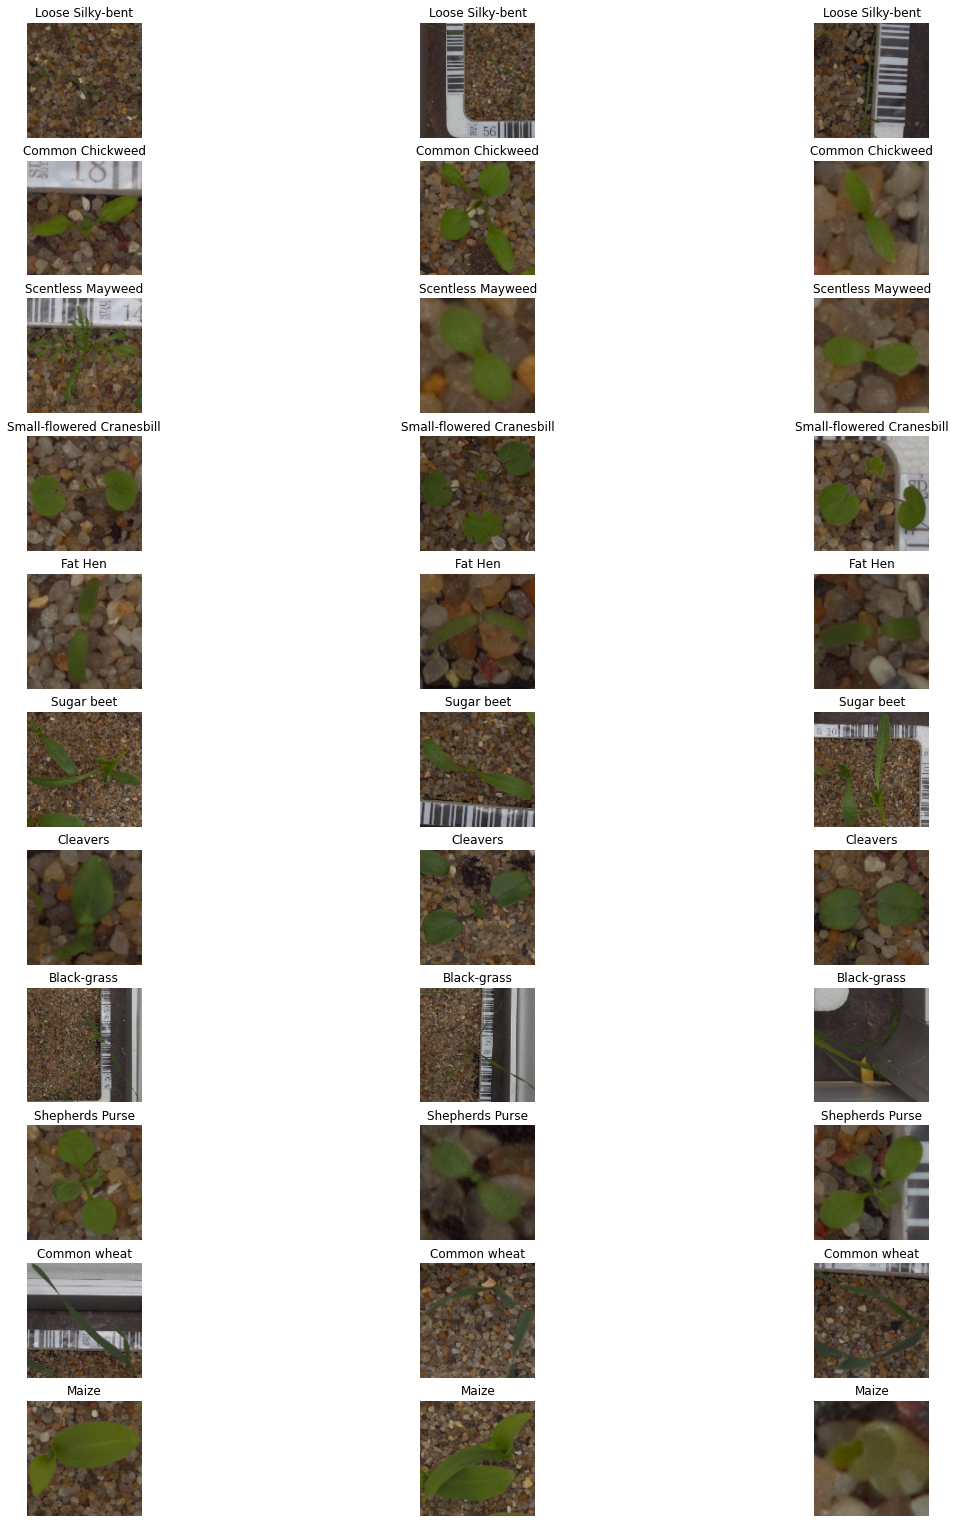

In [11]:
fig = plt.figure(figsize = (20,30))
for i in range(3):
  ax = fig.add_subplot(12, 3, 1+i)
  plt.imshow(cv2.cvtColor(Loose_Silky_bent_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Loose Silky-bent")
  ax.axis('off')

  ax = fig.add_subplot(12, 3, 4+i)
  plt.imshow(cv2.cvtColor(Common_Chickweed_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Common Chickweed")
  ax.axis('off')
  
  ax = fig.add_subplot(12, 3, 7+i)
  plt.imshow(cv2.cvtColor(Scentless_Mayweed_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Scentless Mayweed")
  ax.axis('off')
  
  ax = fig.add_subplot(12, 3, 10+i)
  plt.imshow(cv2.cvtColor(Small_flowered_Cranesbill_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Small-flowered Cranesbill")
  ax.axis('off')
  
  ax = fig.add_subplot(12, 3, 13+i)
  plt.imshow(cv2.cvtColor(Fat_Hen_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Fat Hen")
  ax.axis('off')
  
  ax = fig.add_subplot(12, 3, 16+i)
  plt.imshow(cv2.cvtColor(Charlock_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Charlock")
  ax.axis('off')

  ax = fig.add_subplot(12, 3, 16+i)
  plt.imshow(cv2.cvtColor(Sugar_beet_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Sugar beet")
  ax.axis('off')

  ax = fig.add_subplot(12, 3, 19+i)
  plt.imshow(cv2.cvtColor(Cleavers_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Cleavers")
  ax.axis('off')

  ax = fig.add_subplot(12, 3, 22+i)
  plt.imshow(cv2.cvtColor(Black_grass_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Black-grass")
  ax.axis('off')

  ax = fig.add_subplot(12, 3, 25+i)
  plt.imshow(cv2.cvtColor(Shepherds_Purse_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Shepherds Purse")
  ax.axis('off')

  ax = fig.add_subplot(12, 3, 28+i)
  plt.imshow(cv2.cvtColor(Common_wheat_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Common wheat")
  ax.axis('off')

  ax = fig.add_subplot(12, 3, 31+i)
  plt.imshow(cv2.cvtColor(Maize_imgs[i], cv2.COLOR_BGR2RGB))
  plt.title("Maize")
  ax.axis('off')
  
plt.show()

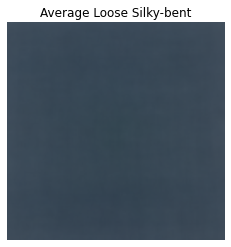

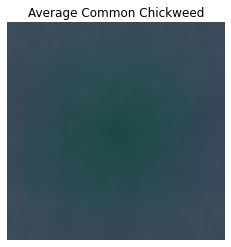

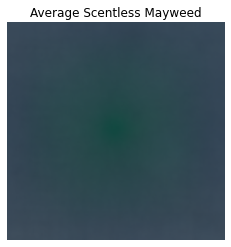

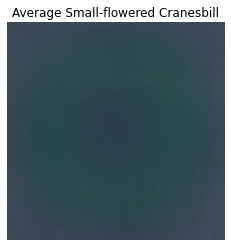

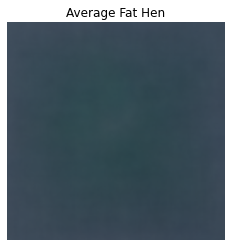

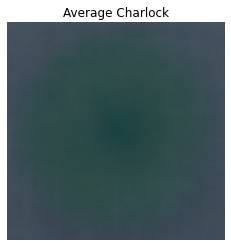

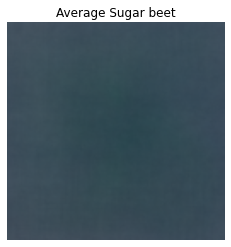

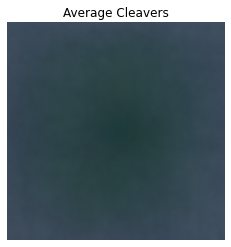

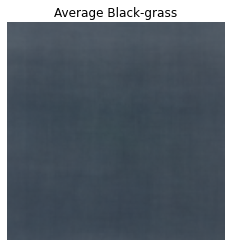

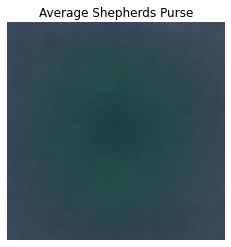

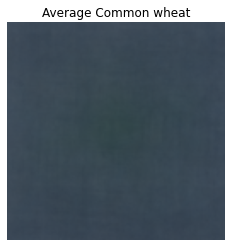

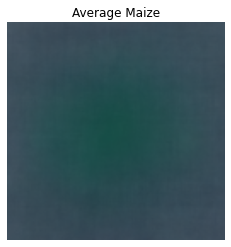

In [12]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    plt.imshow(mean_img/255.0, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

Loose_Silky_bent_mean = find_mean_img(Loose_Silky_bent_imgs, 'Loose Silky-bent')
Common_Chickweed_mean = find_mean_img(Common_Chickweed_imgs, 'Common Chickweed')
Scentless_Mayweed_mean = find_mean_img(Scentless_Mayweed_imgs, 'Scentless Mayweed')
Small_flowered_Cranesbill_mean = find_mean_img(Small_flowered_Cranesbill_imgs, 'Small-flowered Cranesbill')
Fat_Hen_mean = find_mean_img(Fat_Hen_imgs, 'Fat Hen')
Charlock_mean = find_mean_img(Charlock_imgs, 'Charlock')
Sugar_beet_mean = find_mean_img(Sugar_beet_imgs, 'Sugar beet')
Cleavers_mean = find_mean_img(Cleavers_imgs, 'Cleavers')
Black_grass_mean = find_mean_img(Black_grass_imgs, 'Black-grass')
Shepherds_Purse_mean = find_mean_img(Shepherds_Purse_imgs, 'Shepherds Purse')
Common_wheat_mean = find_mean_img(Common_wheat_imgs, 'Common wheat')
Maize_mean = find_mean_img(Maize_imgs, 'Maize')

#### **Converting to Greyscale**

In [13]:
i = 0
images_grey = []
while i < images.shape[0]:
  images_grey.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
  i += 1

In [14]:
images_grey = np.array(images_grey)

In [15]:
images_grey.shape

(4750, 128, 128)

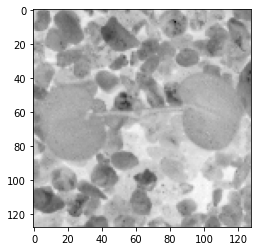

In [16]:
plt.imshow(images_grey[0], cmap='Greys')

### **Data Preprocessing** 

In [17]:
# LabelEncoder class values as integers
labels = np.ravel(labels)
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(labels)
label_encoded_y = label_encoder.transform(labels)

In [18]:
labels

array(['Small-flowered Cranesbill', 'Small-flowered Cranesbill',
       'Small-flowered Cranesbill', ..., 'Loose Silky-bent',
       'Loose Silky-bent', 'Loose Silky-bent'], dtype=object)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(images_grey,label_encoded_y , test_size=0.2, random_state=35,stratify=label_encoded_y)

#### **Gaussian Blurring in Pre-Processing**

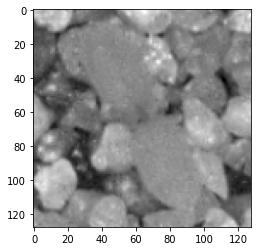

In [20]:
plt.imshow(X_train[0], cmap='gray')

In [21]:
for idx, img in enumerate(X_train):
  X_train[idx] = cv2.GaussianBlur(img, (5, 5), 0)

In [22]:
for idx, img in enumerate(X_test):
  X_test[idx] = cv2.GaussianBlur(img, (5, 5), 0)

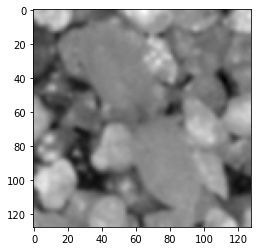

In [23]:
plt.imshow(X_train[0], cmap='gray')

In [24]:
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

#### **Normalization**
- We perform a grayscale normalization to reduce the effect of illumination's differences.

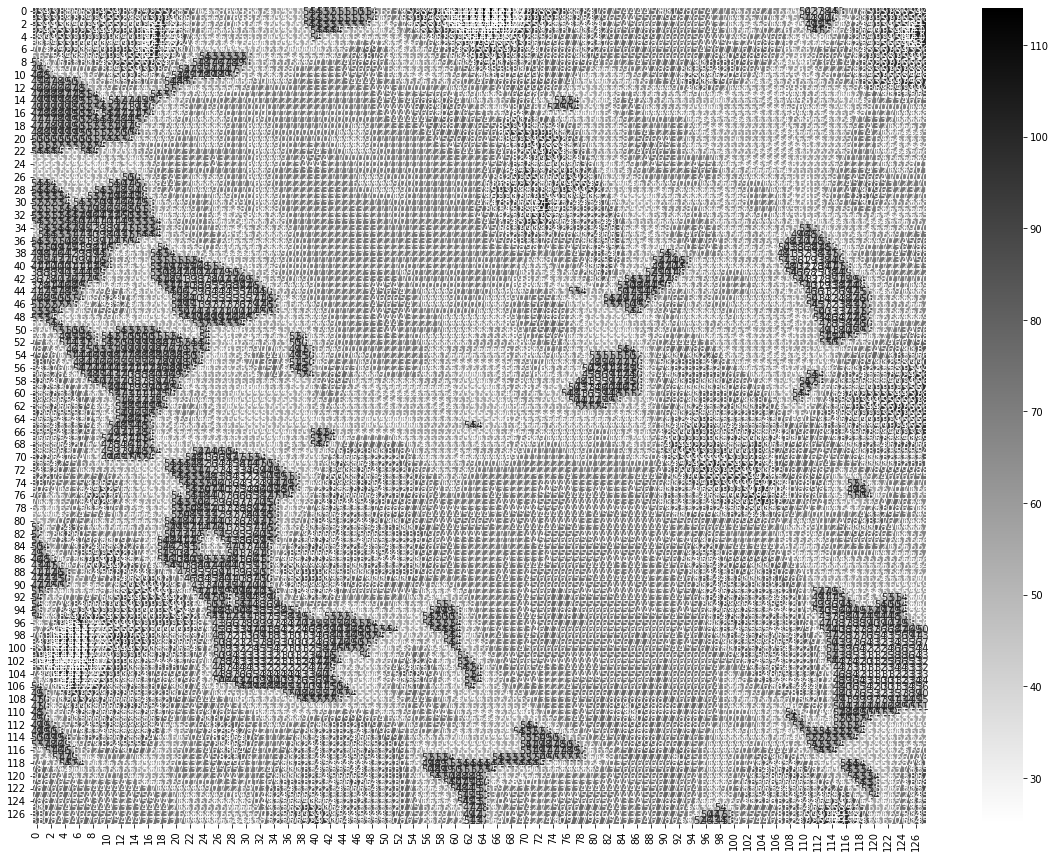

In [25]:
plt.figure(figsize=(20,15)) 
sns.heatmap(X_train[0].reshape(128,128), annot= True, cmap="binary")

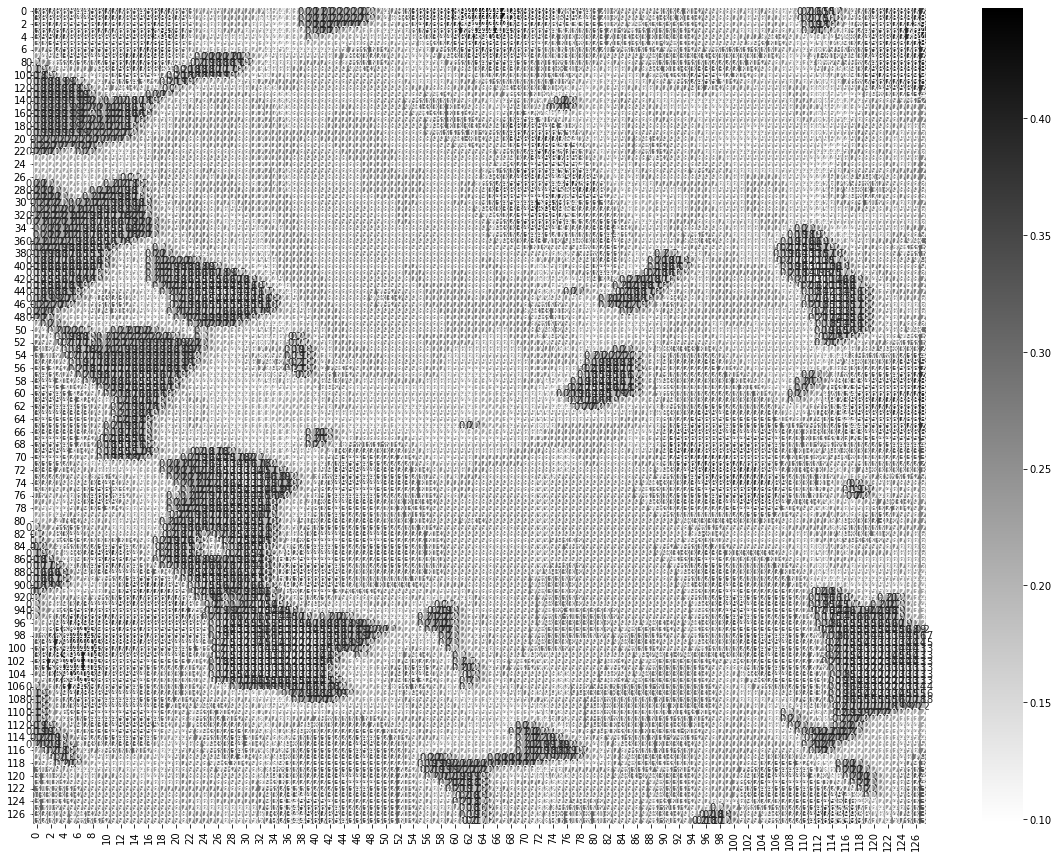

In [26]:
# Normalize the data
X_train = X_train/255
X_test = X_test/255

plt.figure(figsize=(20,15)) 
sns.heatmap(X_train[0].reshape(128,128), annot= True, cmap="binary")

#### **One-Hot Encoding**

In [27]:
encoded = to_categorical(np.array(y_train))
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test))
y_test_e=encoded_test

In [28]:
print(y_train_e.shape)
print(y_test_e.shape)

(3800, 12)
(950, 12)


### **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

In [29]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(12, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [30]:
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 500)               8192500   
                                                                 
 dense_1 (Dense)             (None, 700)               350700    
                                                                 
 dense_2 (Dense)             (None, 12)                8412      
                                                                 
Total params: 8,551,612
Trainable params: 8,551,612
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
47/48 [============================>.] - ETA: 0s - loss: 3.2823 - accuracy: 0.1207
Epoch 1: val_accuracy improved from -inf to 0.11842, saving model to best_model.h5
48/48 [==============================] - 3s 13ms/step - loss: 3.2733 - accuracy: 0.1204 - val_loss: 2.5033 - val_accuracy: 0.1184
Epoch 2/200
47/48 [============================>.] - ETA: 0s - loss: 2.4426 - accuracy: 0.1180
Epoch 2: val_accuracy did not improve from 0.11842
48/48 [==============================] - 0s 6ms/step - loss: 2.4423 - accuracy: 0.1181 - val_loss: 2.4622 - val_accuracy: 0.0947
Epoch 3/200
48/48 [==============================] - ETA: 0s - loss: 2.4077 - accuracy: 0.1434
Epoch 3: val_accuracy improved from 0.11842 to 0.12237, saving model to best_model.h5
48/48 [==============================] - 0s 10ms/step - loss: 2.4077 - accuracy: 0.1434 - val_loss: 2.4528 - val_accuracy: 0.1224
Epoch 4/200
48/48 [==============================] - ETA: 0s - loss: 2.4029 - accuracy: 0.1437
Epoch 4: va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


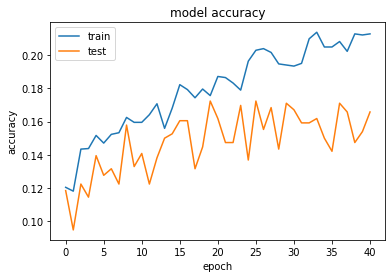

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [33]:
import numpy
model_ann.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 3ms/step - loss: 2.4043 - accuracy: 0.1747


[2.404310464859009, 0.1747368425130844]

As we see here, the **ANN does not show a good test accuracy**, since ANNs are unable to capture spatial correlation characteristics of the image. 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.** 
CNNs tend to behave well on image data but the important point to consider is, it may not be true until an optimized CNN is built depending on the data.

#### **Convolutional Neural Network (CNN)**

**Model 1:** CNN with Dropout

In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64


history=model.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
48/48 [==============================] - ETA: 0s - loss: 2.4390 - accuracy: 0.1266
Epoch 1: val_accuracy improved from -inf to 0.11447, saving model to best_model.h5
48/48 [==============================] - 11s 57ms/step - loss: 2.4390 - accuracy: 0.1266 - val_loss: 2.4288 - val_accuracy: 0.1145
Epoch 2/30
47/48 [============================>.] - ETA: 0s - loss: 2.4251 - accuracy: 0.1233
Epoch 2: val_accuracy improved from 0.11447 to 0.14737, saving model to best_model.h5
48/48 [==============================] - 2s 45ms/step - loss: 2.4245 - accuracy: 0.1240 - val_loss: 2.4285 - val_accuracy: 0.1474
Epoch 3/30
47/48 [============================>.] - ETA: 0s - loss: 2.4210 - accuracy: 0.1330
Epoch 3: val_accuracy did not improve from 0.14737
48/48 [==============================] - 2s 43ms/step - loss: 2.4212 - accuracy: 0.1336 - val_loss: 2.4236 - val_accuracy: 0.1474
Epoch 4/30
47/48 [============================>.] - ETA: 0s - loss: 2.4195 - accuracy: 0.1313
Epoch 4: val_

In [35]:
model.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 11ms/step - loss: 2.4159 - accuracy: 0.1379


[2.4159114360809326, 0.13789473474025726]

Here we can observe that this is performing better than ANN but we will try to optimize this model and improve its performance.

#### **Convolutional Neural Network (CNN)**

**Model 2:** CNN with Dropout after Convolution and having two Dense layers with 16 & 8 units respectively 

Since CNN Model 1 does not appear to have good test accuracy and appears to be overfitting on the training dataset, let's use CNN Model 2, which has a different architecture that should generalize well and not overfit.

In [36]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [37]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln3 = LNmodel(in_shape, [8,16], [16,8], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln3.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 8)       208       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 8)       0         
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        3216      
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [38]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
14/14 [==============================] - ETA: 0s - loss: 2.4962 - accuracy: 0.1020
Epoch 1: val_accuracy improved from -inf to 0.12632, saving model to best_model.h5
14/14 [==============================] - 2s 61ms/step - loss: 2.4962 - accuracy: 0.1020 - val_loss: 2.4662 - val_accuracy: 0.1263
Epoch 2/60
13/14 [==========================>...] - ETA: 0s - loss: 2.4757 - accuracy: 0.1160
Epoch 2: val_accuracy did not improve from 0.12632
14/14 [==============================] - 0s 35ms/step - loss: 2.4755 - accuracy: 0.1149 - val_loss: 2.4683 - val_accuracy: 0.1184
Epoch 3/60
13/14 [==========================>...] - ETA: 0s - loss: 2.4682 - accuracy: 0.1256
Epoch 3: val_accuracy did not improve from 0.12632
14/14 [==============================] - 1s 36ms/step - loss: 2.4678 - accuracy: 0.1263 - val_loss: 2.4623 - val_accuracy: 0.1211
Epoch 4/60
13/14 [==========================>...] - ETA: 0s - loss: 2.4634 - accuracy: 0.1175
Epoch 4: val_accuracy did not improve from 0.1263

In [39]:
model.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 8ms/step - loss: 2.4159 - accuracy: 0.1379


[2.4159114360809326, 0.13789473474025726]

This model unfortunately **does not have a good test accuracy as compared to train and validation accuracy** 

#### **Convolutional Neural Network (CNN)** 

**Model 3:** CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

In [40]:
lr = 0.001
kernelsize = 5
model_ln4 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 8)       208       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128, 128, 8)       0         
                                                                 
 dropout_10 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        3216      
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [41]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln4 = model_ln4.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=40,callbacks=[es,mc])

Epoch 1/40
7/7 [==============================] - ETA: 0s - loss: 2.7709 - accuracy: 0.0994
Epoch 1: val_accuracy improved from -inf to 0.12632, saving model to best_model.h5
7/7 [==============================] - 2s 182ms/step - loss: 2.7709 - accuracy: 0.0994 - val_loss: 2.4739 - val_accuracy: 0.1263
Epoch 2/40
6/7 [========================>.....] - ETA: 0s - loss: 2.4639 - accuracy: 0.1165
Epoch 2: val_accuracy did not improve from 0.12632
7/7 [==============================] - 1s 72ms/step - loss: 2.4637 - accuracy: 0.1173 - val_loss: 2.4829 - val_accuracy: 0.1132
Epoch 3/40
7/7 [==============================] - ETA: 0s - loss: 2.4315 - accuracy: 0.1377
Epoch 3: val_accuracy did not improve from 0.12632
7/7 [==============================] - 1s 72ms/step - loss: 2.4315 - accuracy: 0.1377 - val_loss: 2.4470 - val_accuracy: 0.1132
Epoch 4/40
7/7 [==============================] - ETA: 0s - loss: 2.4235 - accuracy: 0.1415
Epoch 4: val_accuracy did not improve from 0.12632
7/7 [======

In [42]:
model.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 8ms/step - loss: 2.4159 - accuracy: 0.1379


[2.4159114360809326, 0.13789473474025726]

### **Plotting the Train & Validation Accuracy**

**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


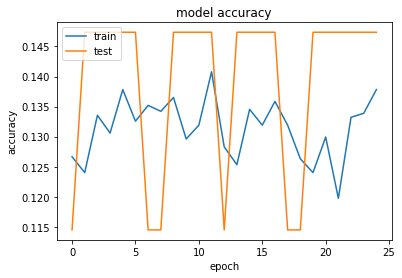

In [43]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


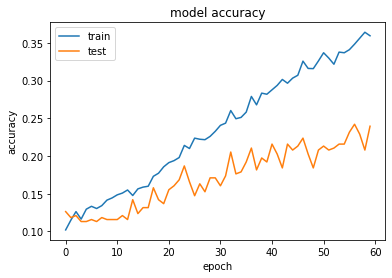

In [44]:
print(history_model_ln3.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln3.history['accuracy'])
plt.plot(history_model_ln3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


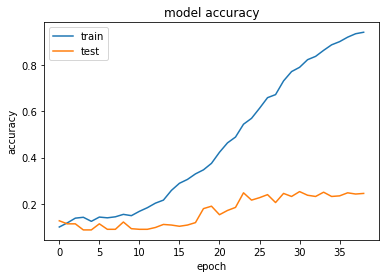

In [45]:
print(history_model_ln4.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln4.history['accuracy'])
plt.plot(history_model_ln4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### **Model Evaluation**

**CNN Model 1**

In [46]:
model.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 8ms/step - loss: 2.4159 - accuracy: 0.1379


[2.4159114360809326, 0.13789473474025726]

**CNN Model 2**

In [47]:
model_ln3.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 4ms/step - loss: 2.4121 - accuracy: 0.2179


[2.4121475219726562, 0.21789473295211792]

**CNN Model 3**

In [48]:
model_ln4.evaluate(X_test,y_test_e)

30/30 [==============================] - 0s 4ms/step - loss: 3.4691 - accuracy: 0.2453


[3.4690887928009033, 0.24526315927505493]

Unfortunately, **we cannot decide the best model based on only test accuracy here**  so we are more concerned with **Precision and Recall**. Since these two metrics are both quite important in this scenario, we will also check the **F1 score** to try to achieve a good balance between Precision and Recall. 

### **Plotting the confusion matrix for the two best models** 

As we can see, **Model 2 and Model 3 seem to be generalizing well** because they both have a good Holdout set Accuracy. **Let us compute the confusion matrix** for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

**CNN Model 2**

In [49]:
# Test Prediction 
y_test_pred_ln3 = model_ln3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
y_test_pred_prob_ln3 = np.max(y_test_pred_ln3, axis=1)


In [50]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln3)



0.21789473684210525

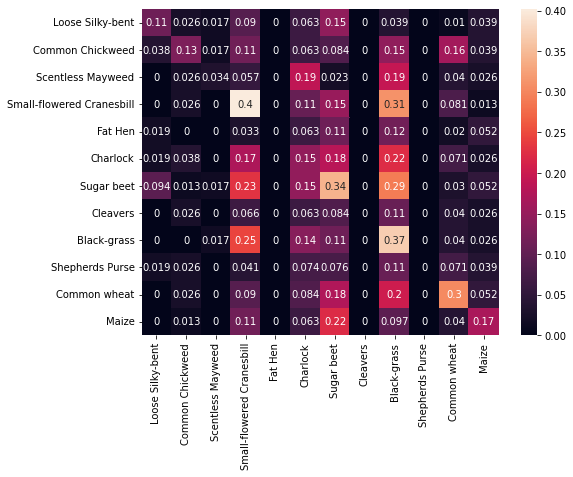

In [51]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=plant_categories, yticklabels=plant_categories, annot=True)

**CNN Model 3**

In [52]:
#Test Prediction 

y_test_pred_ln4 = model_ln4.predict(X_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)
y_test_pred_prob_ln4 = np.max(y_test_pred_ln4, axis=1)


In [53]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln4)



0.24526315789473685

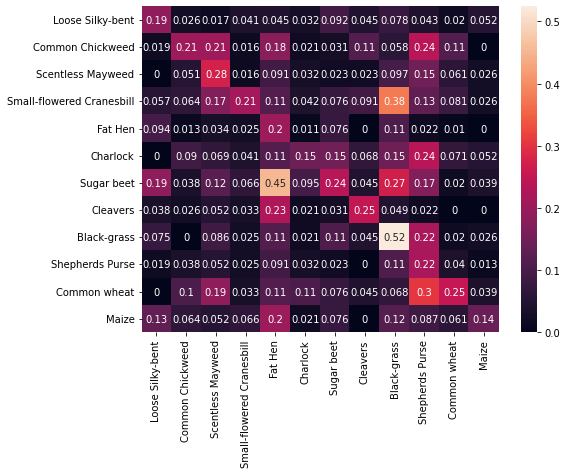

In [54]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln4)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=plant_categories, yticklabels=plant_categories, annot=True)

The above two confusion matrices show that the models seem to be working well. **Let's calculate the F1 score** (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



The order of printing the above metrices for each class is as follows:

- **Glioma Tumor**
- **Meningioma Tumor**
- **Non Tumor**
- **Pituitary Tumor**



**CNN Model 2**

In [55]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln3, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.375      0.37037037 0.33333333 0.24257426 0.         0.12280702
 0.2        0.         0.16740088 0.         0.33333333 0.30232558]
 Recall is [0.11320755 0.12820513 0.03448276 0.40163934 0.         0.14736842
 0.34351145 0.         0.36893204 0.         0.3030303  0.16883117] 
 f_beta Score is [0.17391304 0.19047619 0.0625     0.30246914 0.         0.13397129
 0.25280899 0.         0.23030303 0.         0.31746032 0.21666667]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**CNN Model 3**

In [56]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln4, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.23255814 0.28571429 0.20779221 0.35616438 0.10465116 0.25454545
 0.23664122 0.34375    0.26213592 0.11764706 0.33783784 0.34375   ]
 Recall is [0.18867925 0.20512821 0.27586207 0.21311475 0.20454545 0.14736842
 0.23664122 0.25       0.52427184 0.2173913  0.25252525 0.14285714] 
 f_beta Score is [0.20833333 0.23880597 0.23703704 0.26666667 0.13846154 0.18666667
 0.23664122 0.28947368 0.34951456 0.15267176 0.28901734 0.20183486]


**Model 3 (Best) Observation**

As we see from the precision for each class, the Pituitary tumor classifier has the highest precision. But here, **we are more concerned about the case where a person who has a tumor is wrongly classified as belonging to the non-tumor category (False Negative).** 

**33% of the persons belonging to Glioma tumour and 8.6% belonging to Meningioma tumor are not identified correctly, and the model predicts that they don't have a tumor at all** - which shows that our model does not do well in identifying glioma and meningioma tumors. But it is works well for the other scenario, where the model is able to correctly identify those scans that do not not show a tumor. 

---



### **Weighted F-Score**

**Model 2**

In [57]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln3, average='weighted')

0.1918727745977594

**Model 3**

In [58]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln4, average='weighted')

0.24283094619024045

Model 3 with 2 Dense layer and more  number of units having better F1 score.

### **Prediction**

Let us predict with best model with is model_ln4

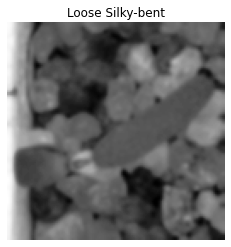

In [59]:
#fn = image.load_img(fp, target_size = (128,128), color_mode='grayscale')
plt.imshow(X_test[1].reshape(128,128), cmap='Greys_r')
i=y_test[1]
i=np.argmax(i)

plt.title(plant_categories[i])

plt.axis('off')
plt.show()

In [60]:
res=model_ln4.predict(X_test[1].reshape(1,128,128,1))

In [61]:
i=np.argmax(res)

print(plant_categories[i])


Scentless Mayweed


### **Conclusion**

As we have seen, **ANNs do not work well with image data**, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas CNNs take the full 2D-image as input in order to perform feature extraction. So **CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.**

**There is still scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better brain tumor classifier. 

We can visualize the filters  and understand why the model does not do well in the identification of the glioma tumor.
